In [1]:
import pandas as pd
import numpy as np
import os
from collections import defaultdict
import collections
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 05/12/2021
train_df = pd.read_csv('D:\\annotating_paleoclimate_data\\paleorec\\data\\csv\\lipdverse_downsampled_20210511_144705.csv')
test_df = pd.read_csv('D:\\annotating_paleoclimate_data\\paleorec\\data\\csv\\lipdverse_test_20210511_144705.csv')

train_df = train_df.replace(np.nan, 'NA', regex=True)
test_df = test_df.replace(np.nan, 'NA', regex=True)

In [3]:
def calc_freq(dataframe_obj, col1, col2):

    counter_dict = {}
    for index, row in dataframe_obj.iterrows():
        if row[col1] not in counter_dict:
            counter_dict[row[col1]] = {}
            counter_dict[row[col1]][row[col2]] = 1
        else:
            if row[col2] not in counter_dict[row[col1]]:
                counter_dict[row[col1]][row[col2]] = 1
            else:
                counter_dict[row[col1]][row[col2]] += 1
    return counter_dict

In [4]:
arch_proxy_train = calc_freq(train_df, 'archiveType', 'proxyObservationType')
arch_proxy_test = calc_freq(test_df, 'archiveType', 'proxyObservationType')

In [5]:
def normalize_freq(dict_obj):
    for key, in_dict in dict_obj.items():
        sum_ = sum(list(in_dict.values()))
        for k, v in in_dict.items():
            in_dict[k] = v/sum_

normalize_freq(arch_proxy_train)
normalize_freq(arch_proxy_test)

In [8]:
def draw_barplots(train_dict, test_dict, xlabel_text):
    for key in test_dict.keys():
        labels = train_dict[key].keys()
        train_val, test_val = [], []
        for label in labels:
            train_val.append(train_dict[key][label])
            test_val.append(test_dict[key][label] if label in test_dict[key] else 0)

        print('PLOT FOR : {}'.format(key.upper()))
        x = np.arange(len(labels))  # the label locations
        width = 0.35  # the width of the bars

        fig, ax = plt.subplots(figsize=(12,8))

        rects1 = ax.bar(x - width/2, train_val, width, label='Train')
        rects2 = ax.bar(x + width/2, test_val, width, label='Test')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('Frequency')
        ax.set_xlabel(xlabel_text)
        ax.set_xticks(x)
        ax.set_xticklabels(labels,rotation='vertical', ha='center')
        ax.legend()

        def autolabel(rects):
            """
            Attach a text label above each bar displaying its height
            """
            for rect in rects:
                height = rect.get_height()
                ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                        '%f' % (height),
                        ha='center', va='bottom', rotation='vertical')

        autolabel(rects1)
        autolabel(rects2)

        fig.tight_layout()

        plt.show()
        print('**********************************************************************************************************')

PLOT FOR : GLACIERICE


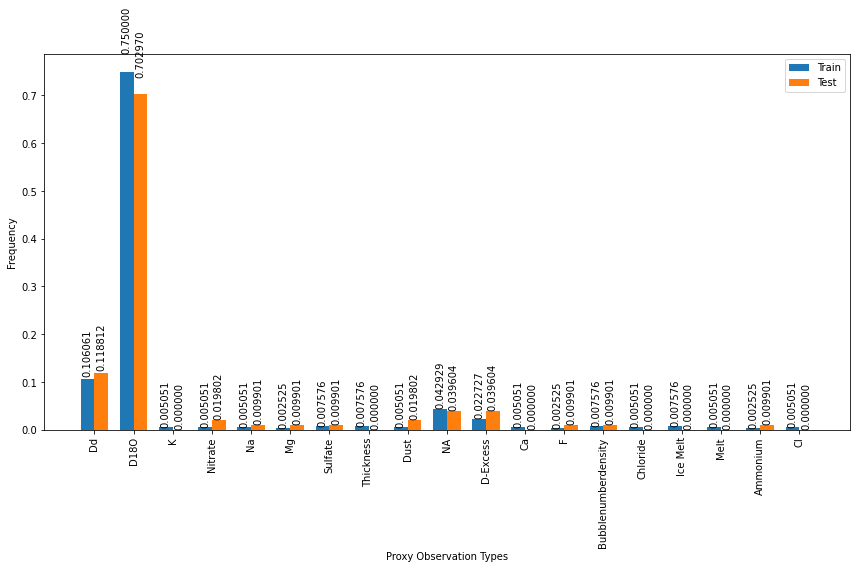

**********************************************************************************************************
PLOT FOR : PEAT


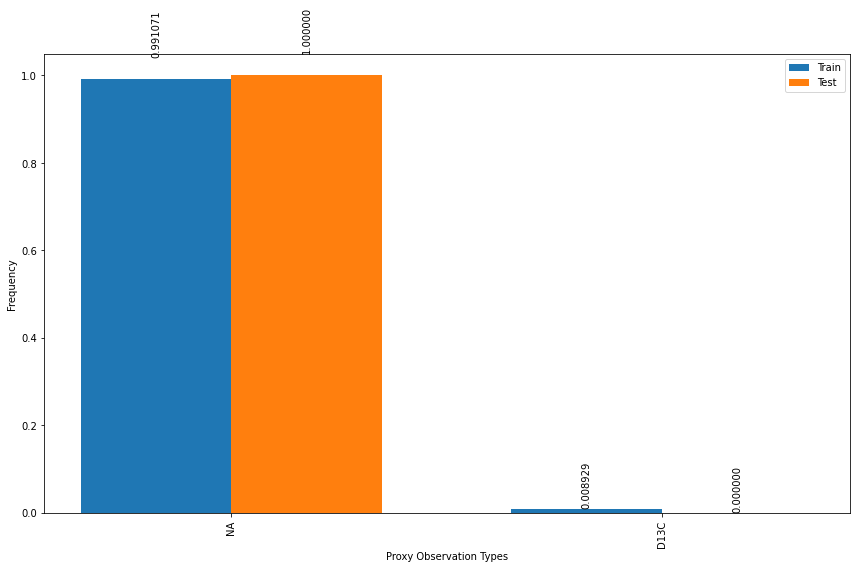

**********************************************************************************************************
PLOT FOR : MARINESEDIMENT


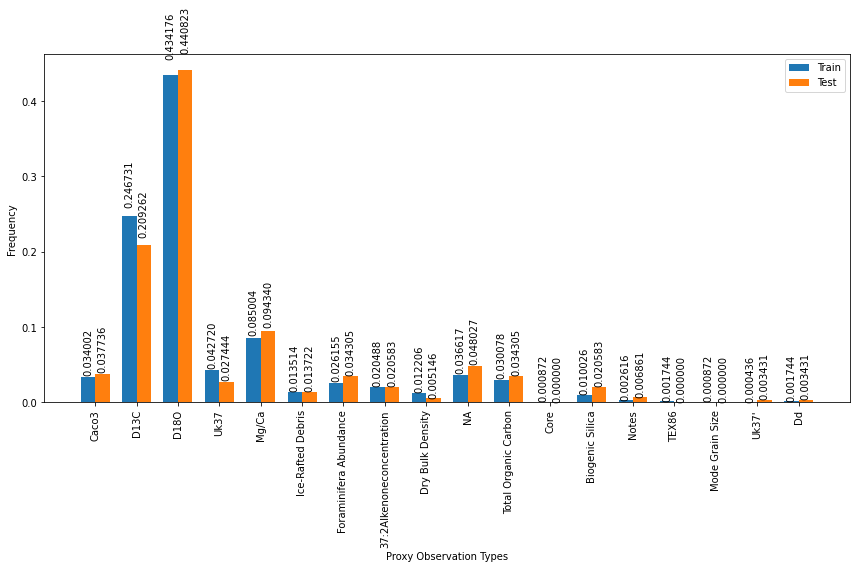

**********************************************************************************************************
PLOT FOR : CORAL


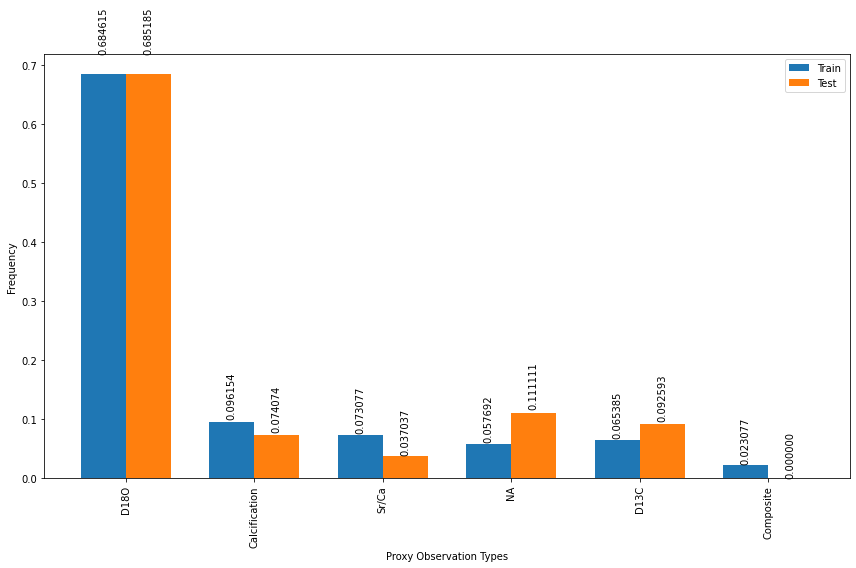

**********************************************************************************************************
PLOT FOR : WOOD


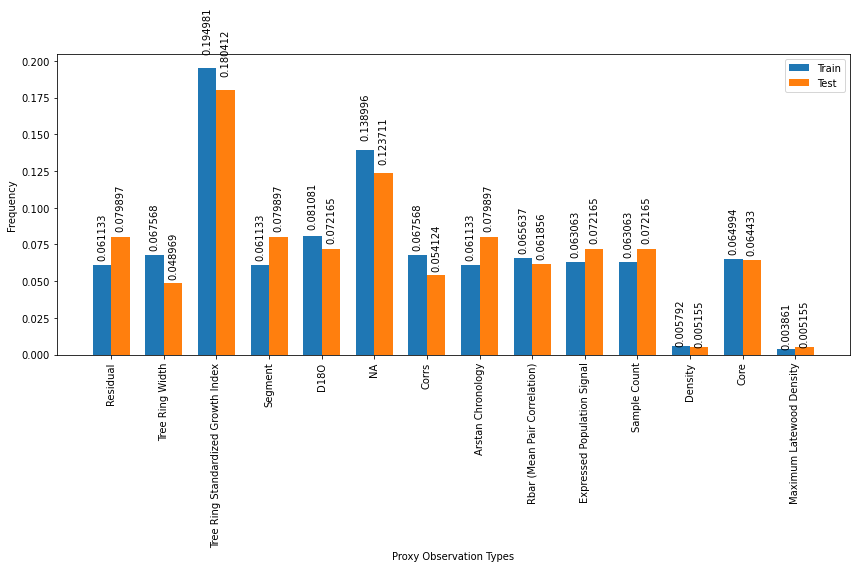

**********************************************************************************************************
PLOT FOR : LAKESEDIMENT


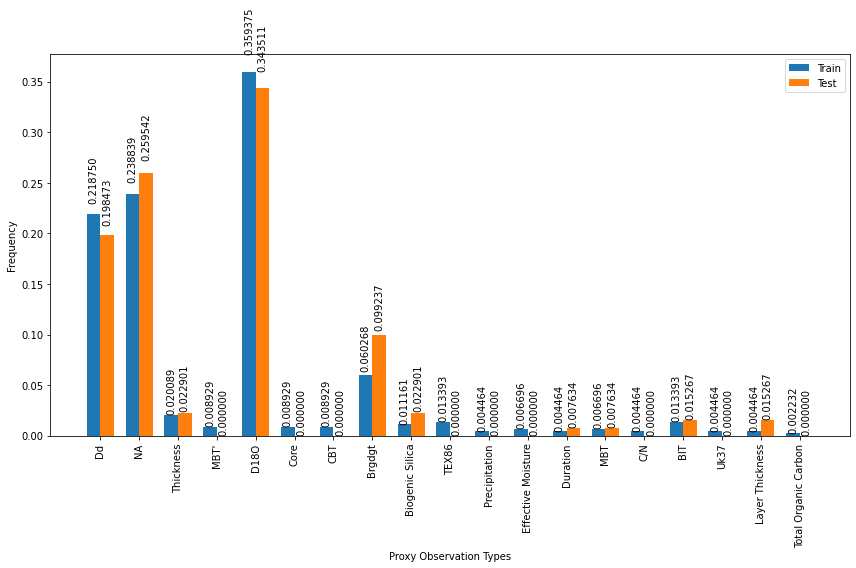

**********************************************************************************************************
PLOT FOR : SPELEOTHEM


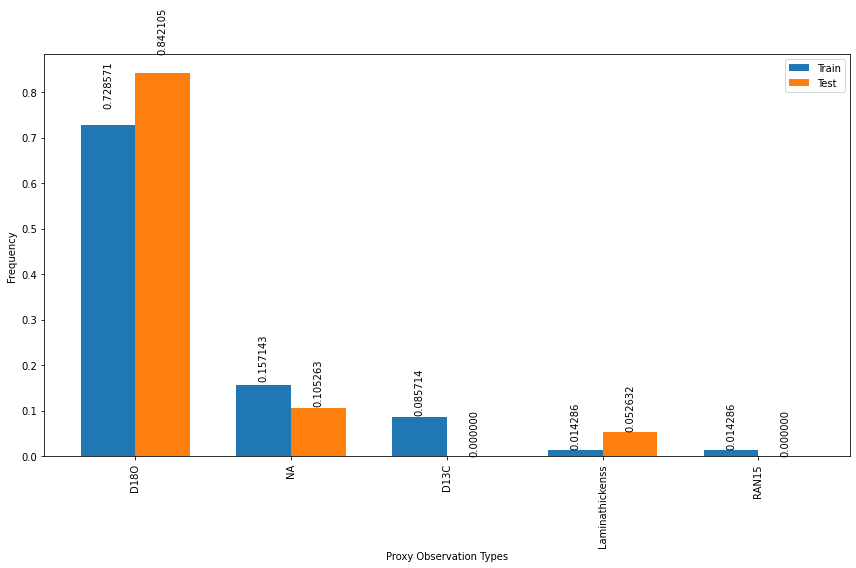

**********************************************************************************************************
PLOT FOR : HYBRID


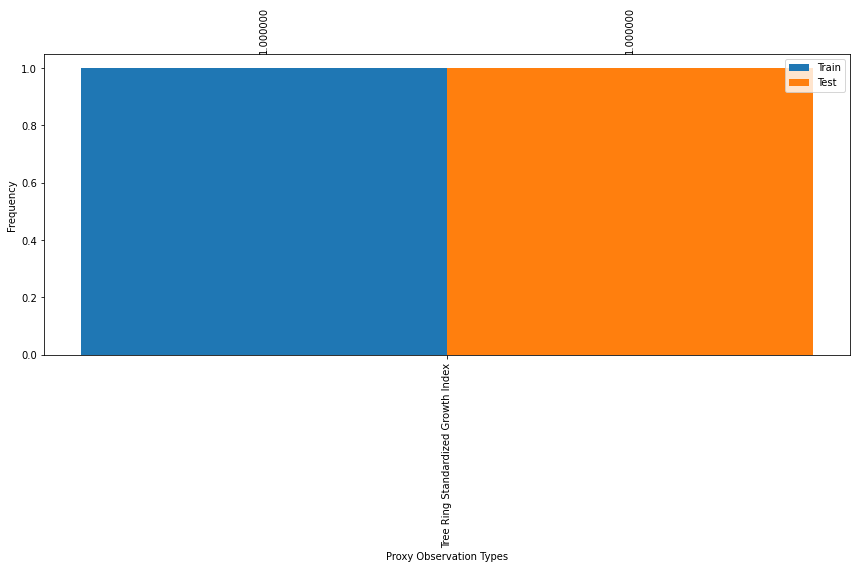

**********************************************************************************************************
PLOT FOR : MIDDEN


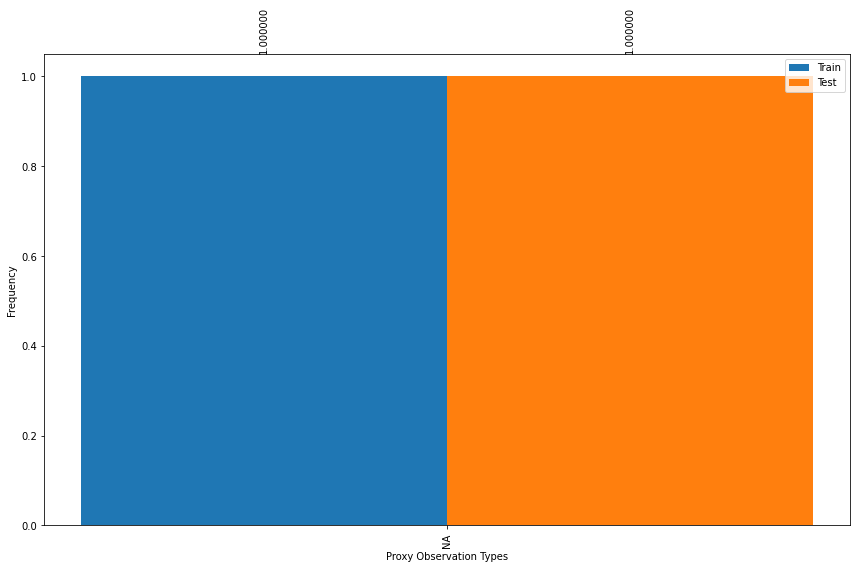

**********************************************************************************************************
PLOT FOR : TERRESTRIALSEDIMENT


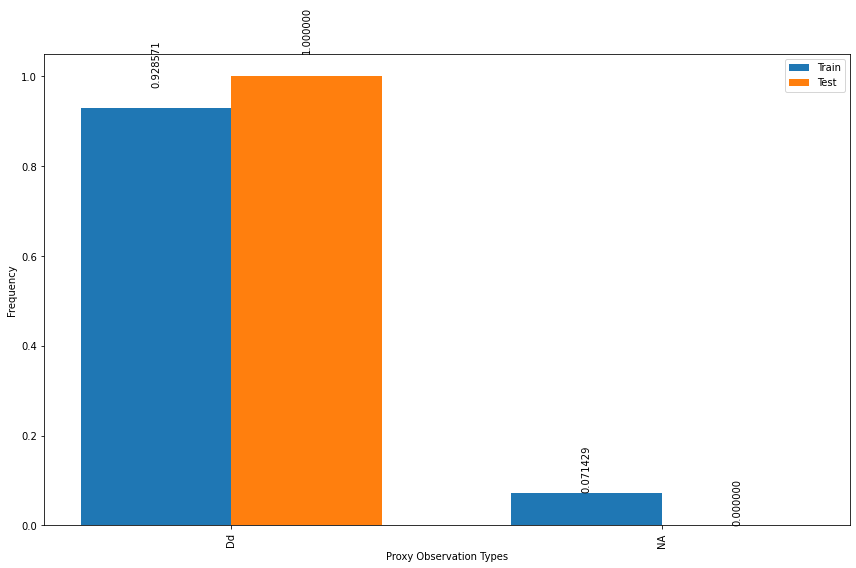

**********************************************************************************************************
PLOT FOR : GROUNDICE


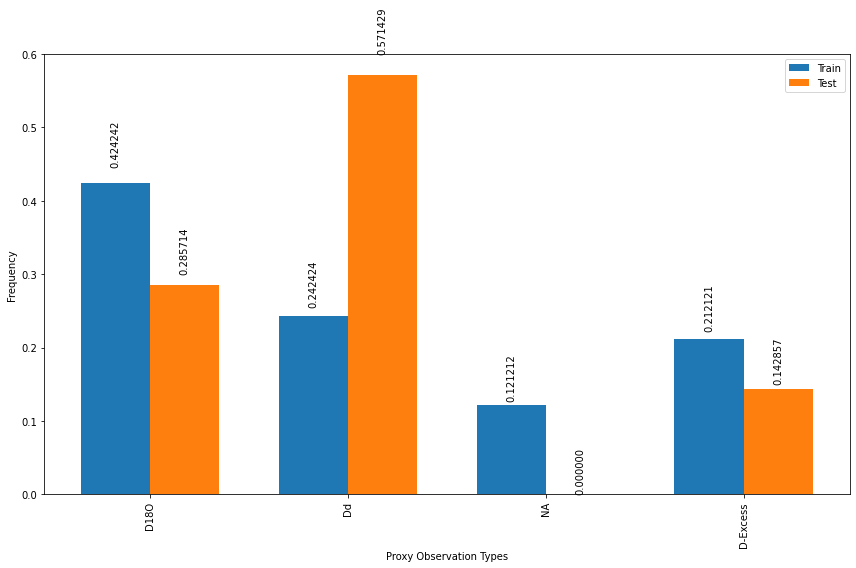

**********************************************************************************************************
PLOT FOR : SCLEROSPONGE


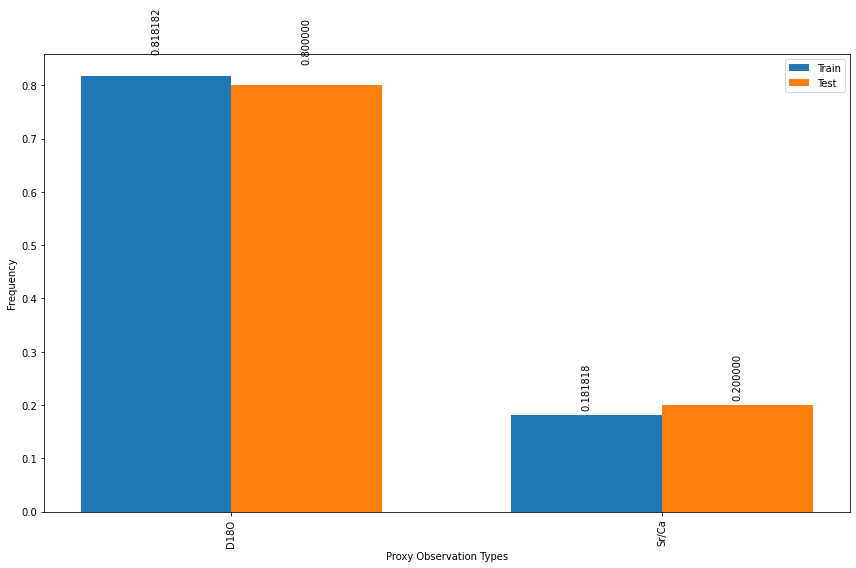

**********************************************************************************************************
PLOT FOR : ICE-OTHER


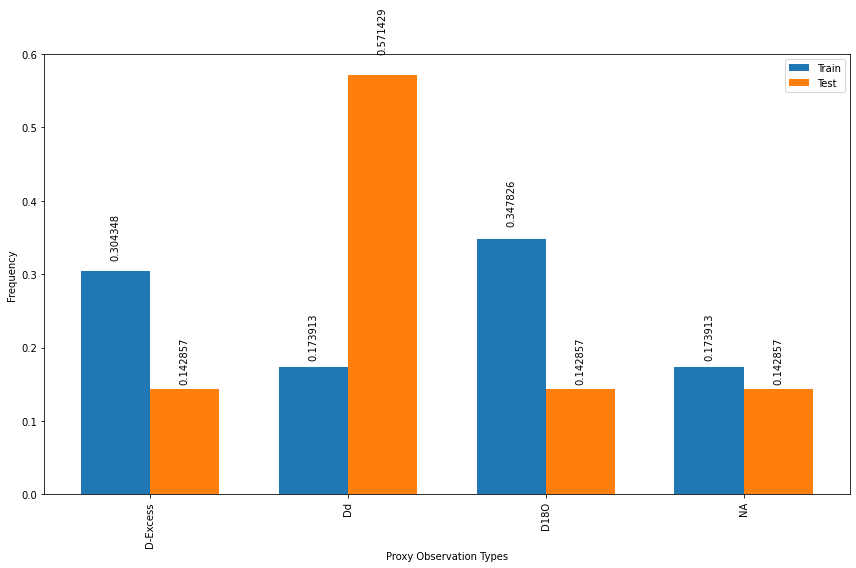

**********************************************************************************************************


In [9]:
draw_barplots(arch_proxy_train, arch_proxy_test, 'Proxy Observation Types')

PLOT FOR : D18O


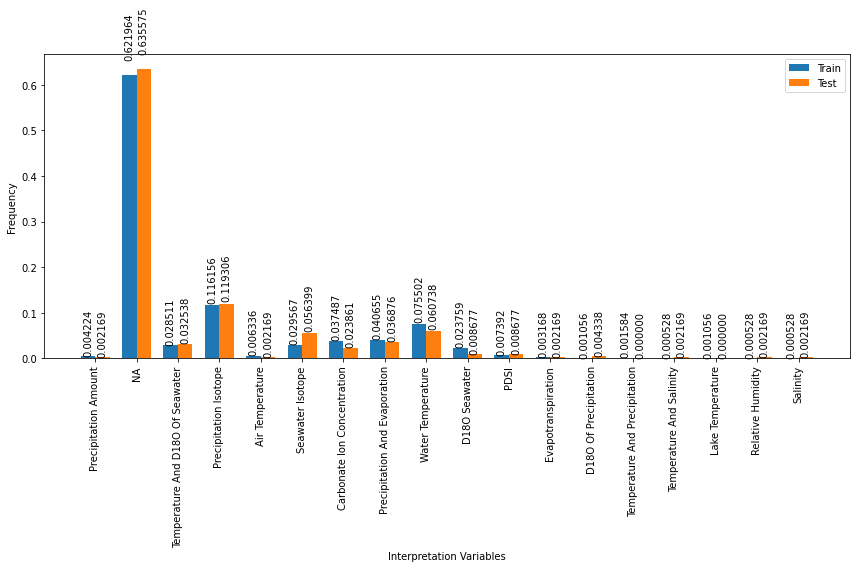

**********************************************************************************************************
PLOT FOR : NA


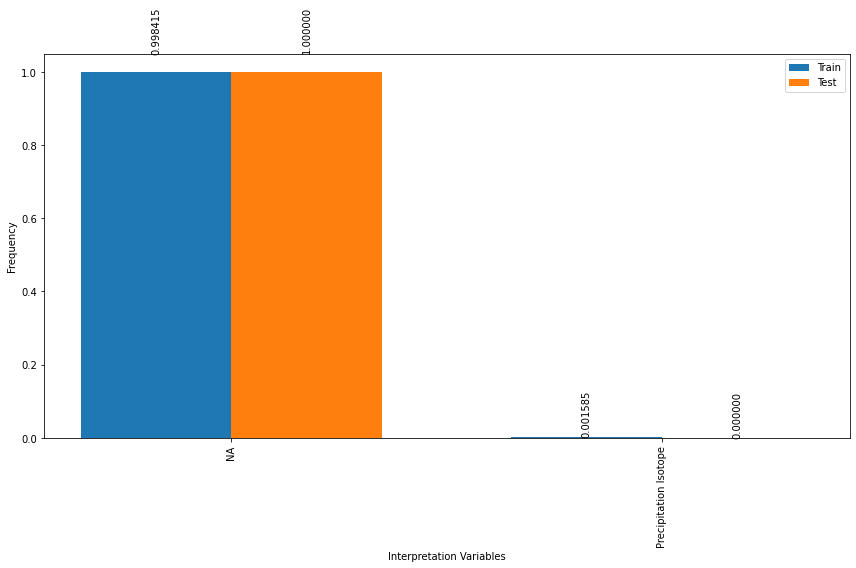

**********************************************************************************************************
PLOT FOR : MG/CA


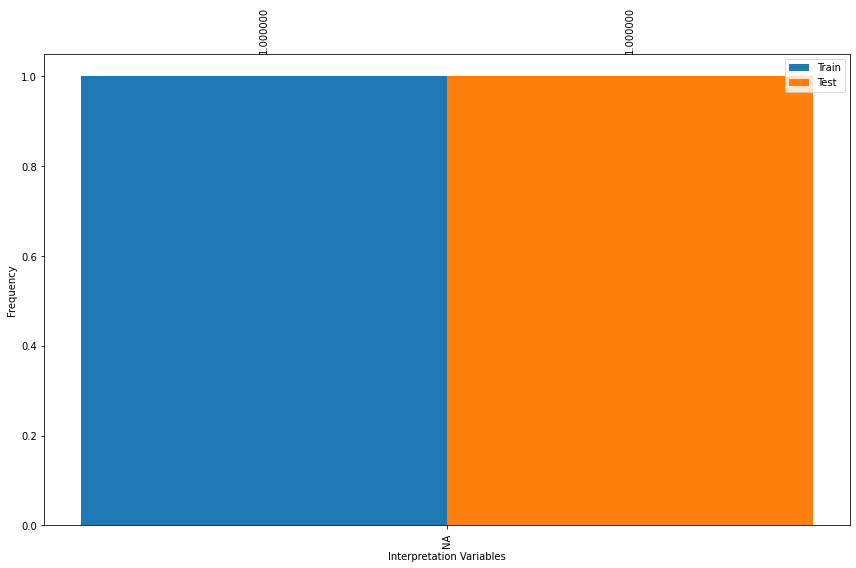

**********************************************************************************************************
PLOT FOR : D13C


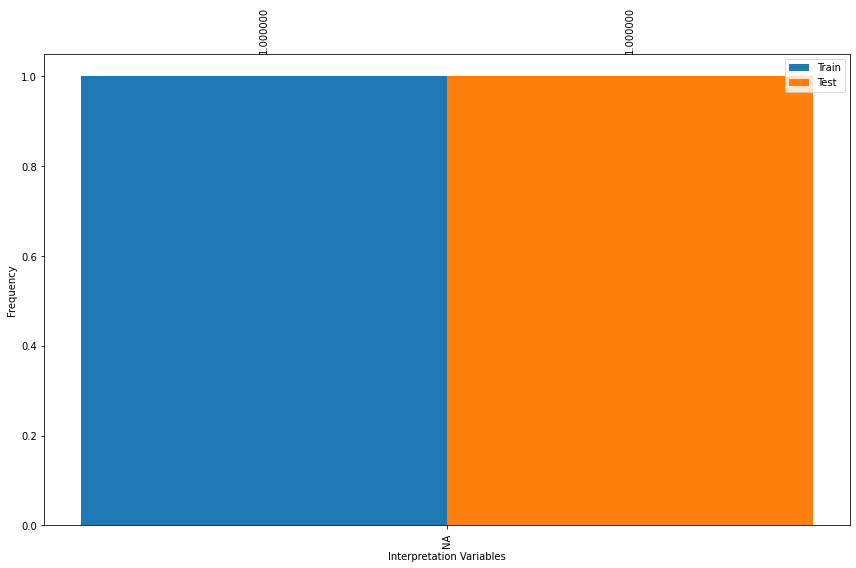

**********************************************************************************************************
PLOT FOR : SR/CA


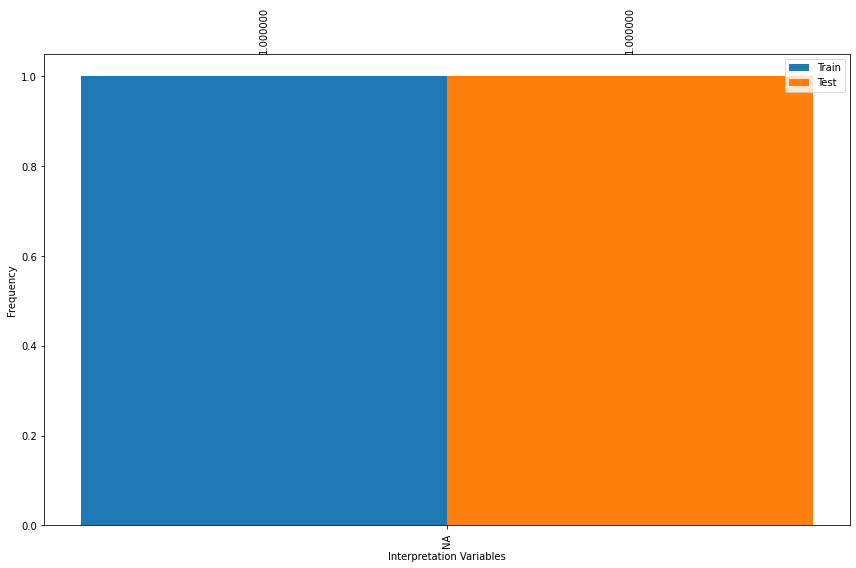

**********************************************************************************************************
PLOT FOR : TREE RING WIDTH


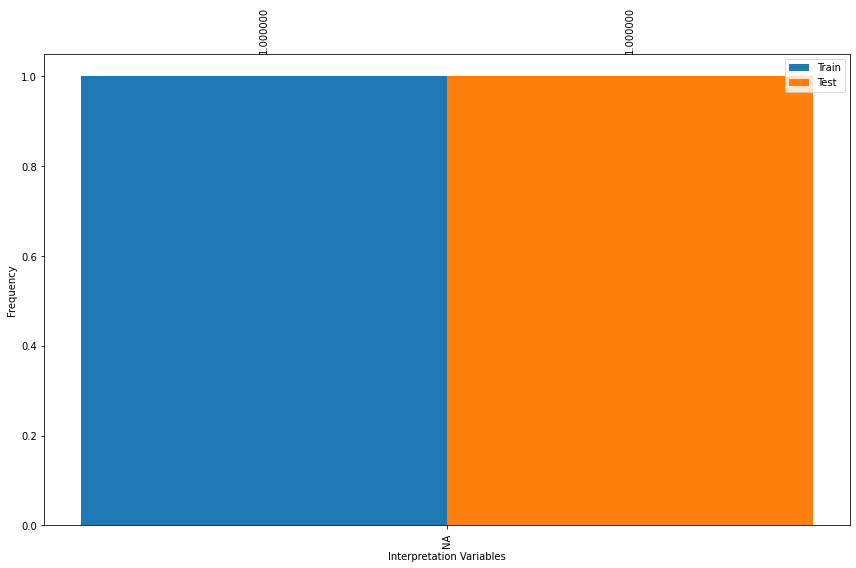

**********************************************************************************************************
PLOT FOR : RBAR (MEAN PAIR CORRELATION)


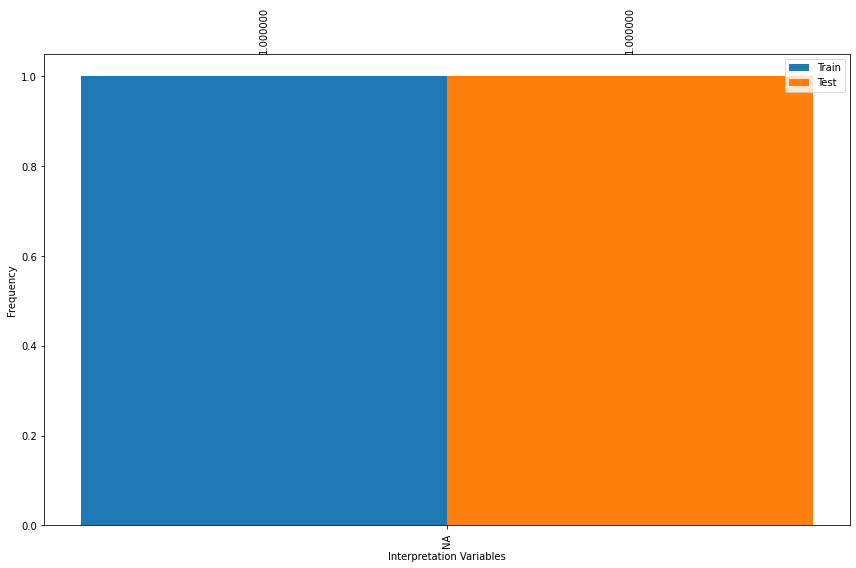

**********************************************************************************************************
PLOT FOR : TOTAL ORGANIC CARBON


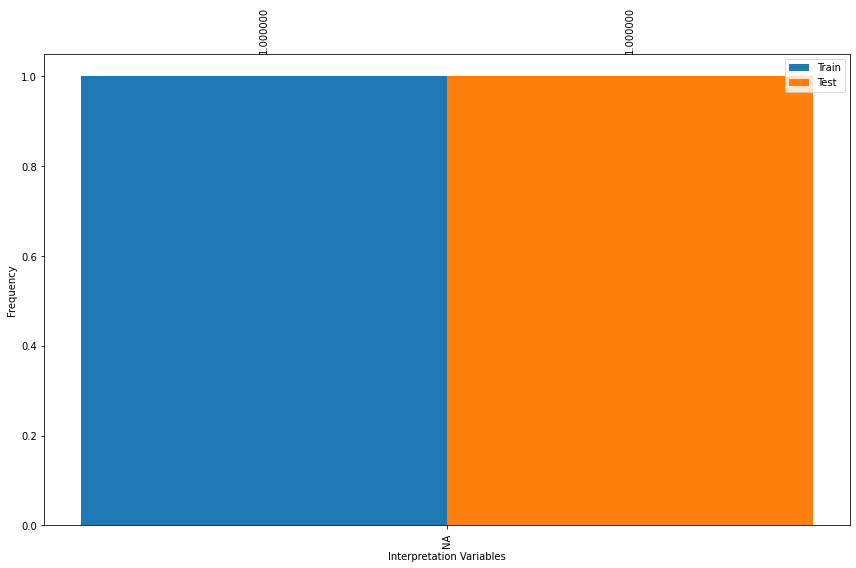

**********************************************************************************************************
PLOT FOR : SAMPLE COUNT


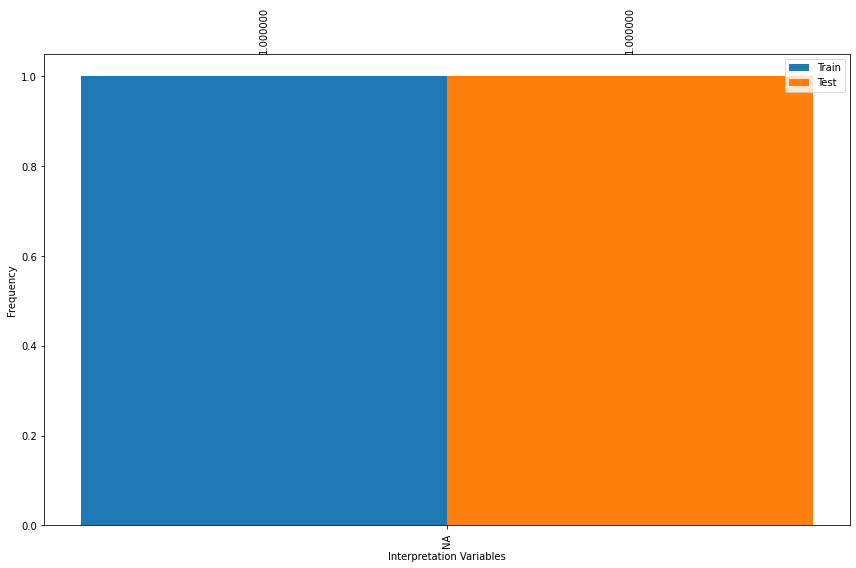

**********************************************************************************************************
PLOT FOR : DRY BULK DENSITY


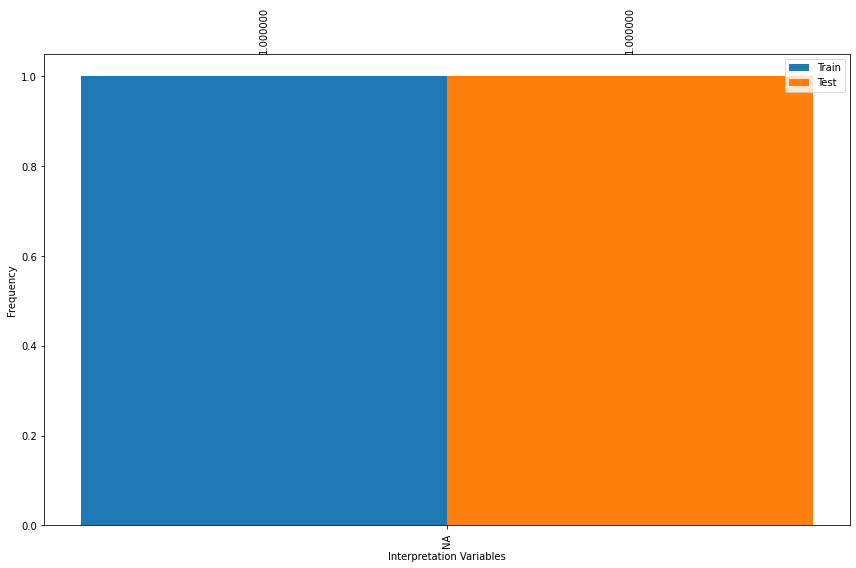

**********************************************************************************************************
PLOT FOR : ARSTAN CHRONOLOGY


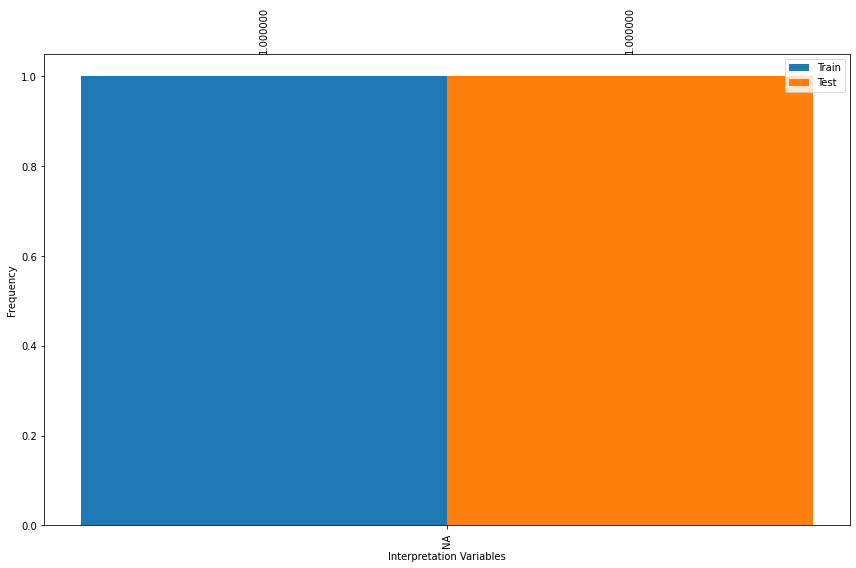

**********************************************************************************************************
PLOT FOR : DD


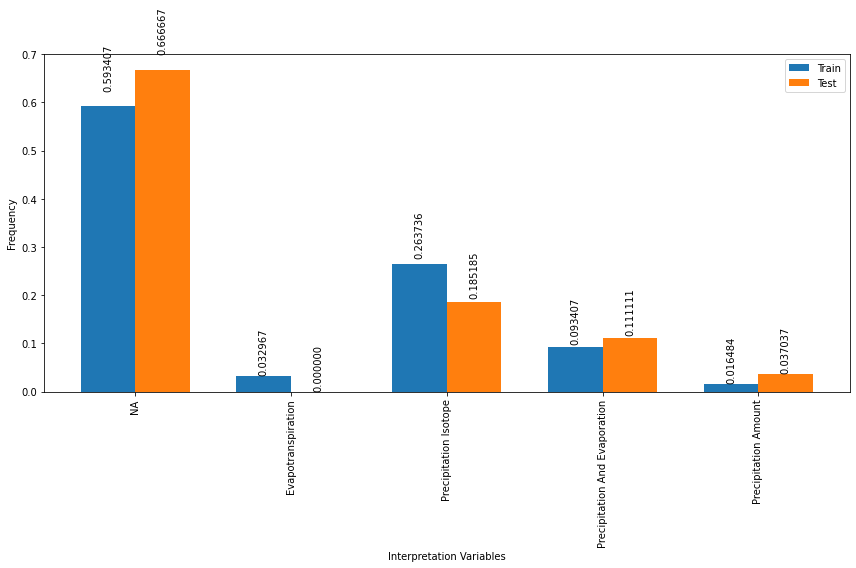

**********************************************************************************************************
PLOT FOR : FORAMINIFERA ABUNDANCE


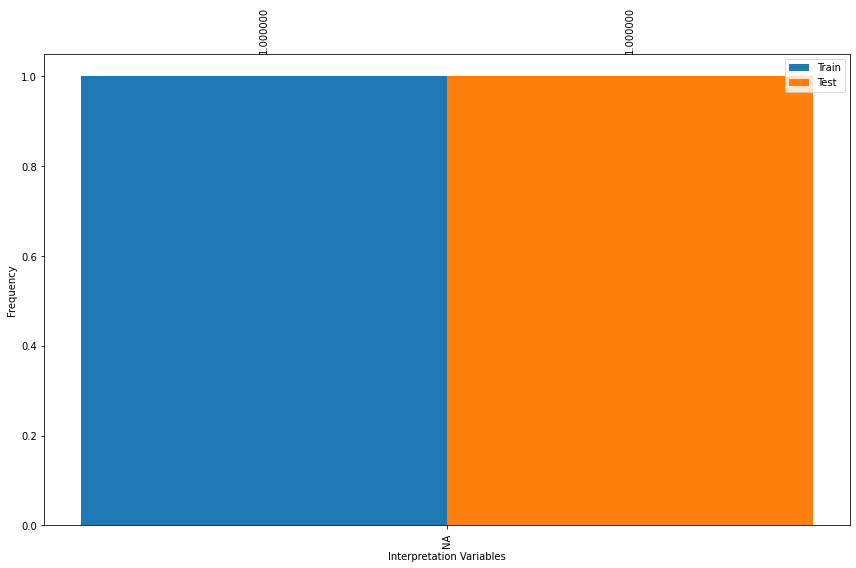

**********************************************************************************************************
PLOT FOR : TREE RING STANDARDIZED GROWTH INDEX


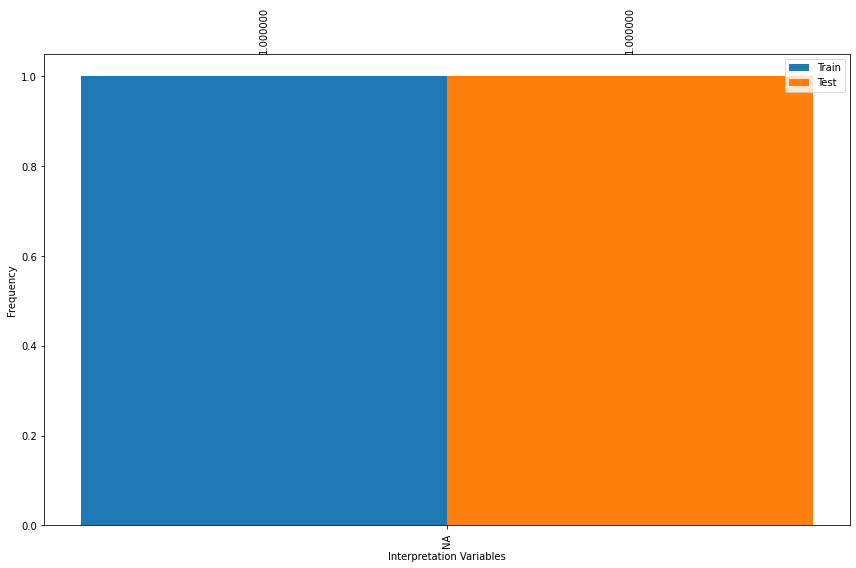

**********************************************************************************************************
PLOT FOR : CORRS


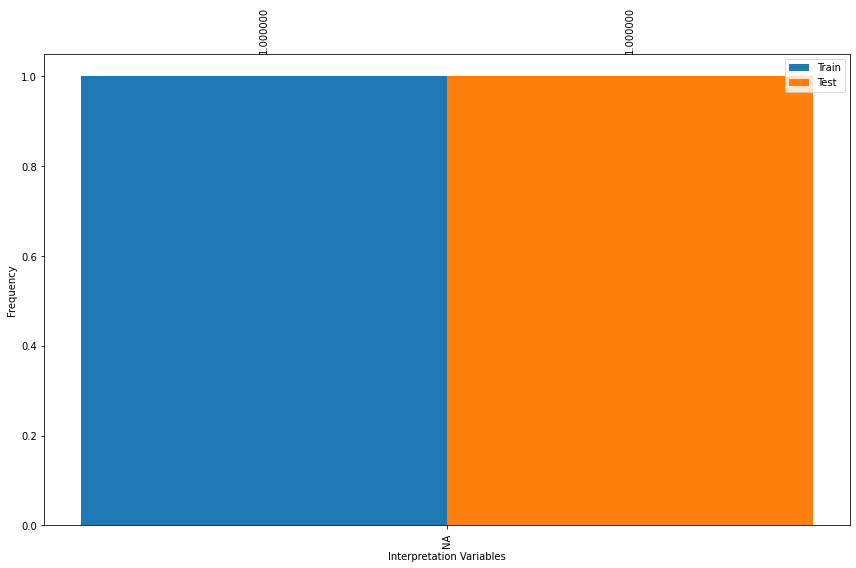

**********************************************************************************************************
PLOT FOR : ICE-RAFTED DEBRIS


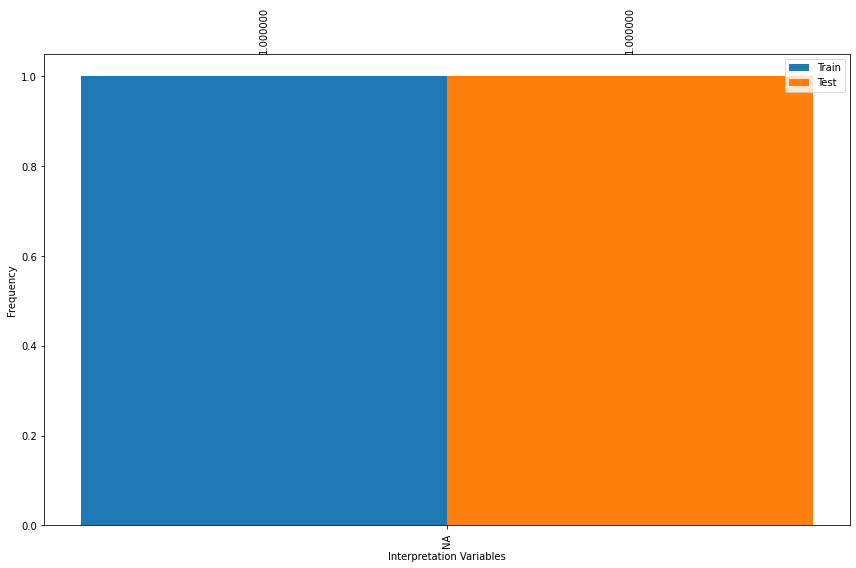

**********************************************************************************************************
PLOT FOR : RESIDUAL


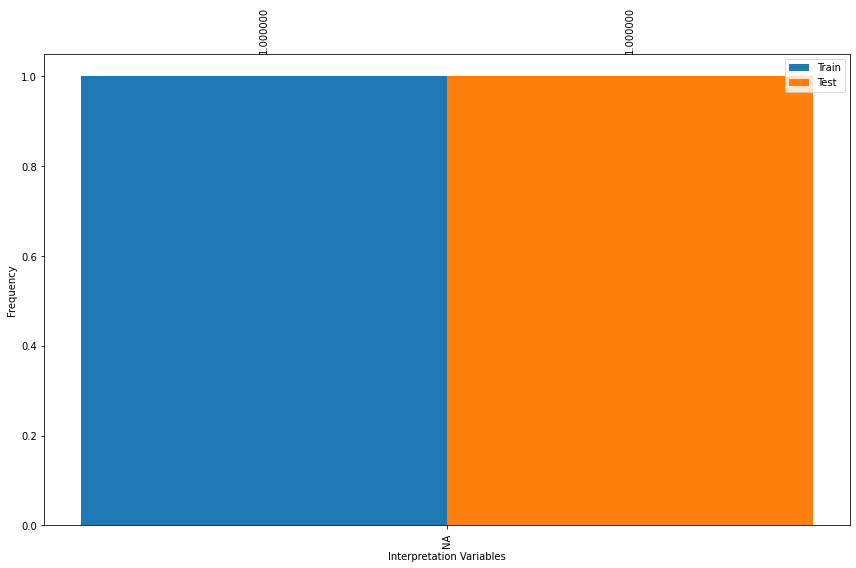

**********************************************************************************************************
PLOT FOR : DUST


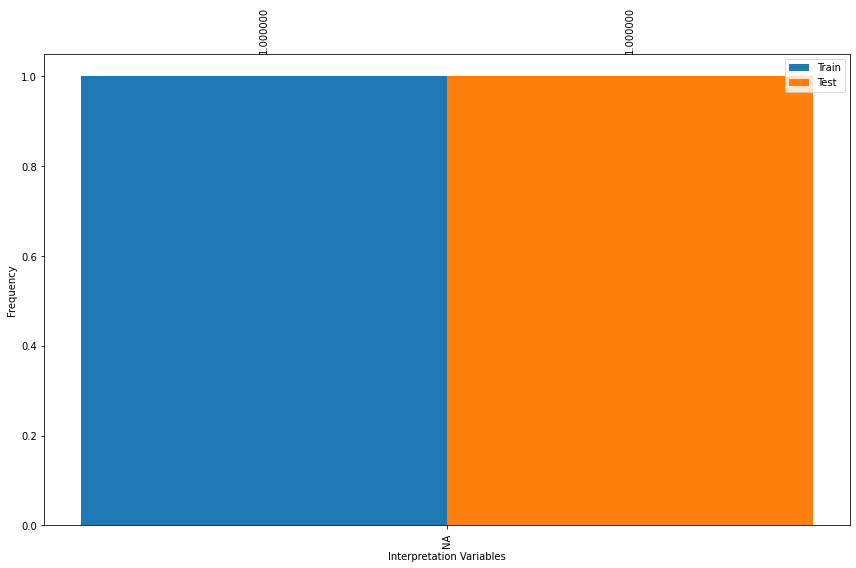

**********************************************************************************************************
PLOT FOR : LAYER THICKNESS


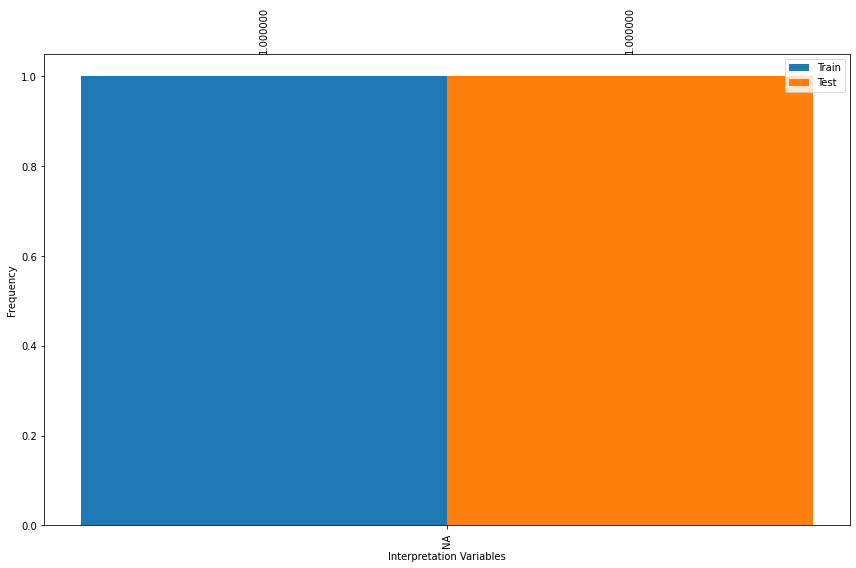

**********************************************************************************************************
PLOT FOR : CACO3


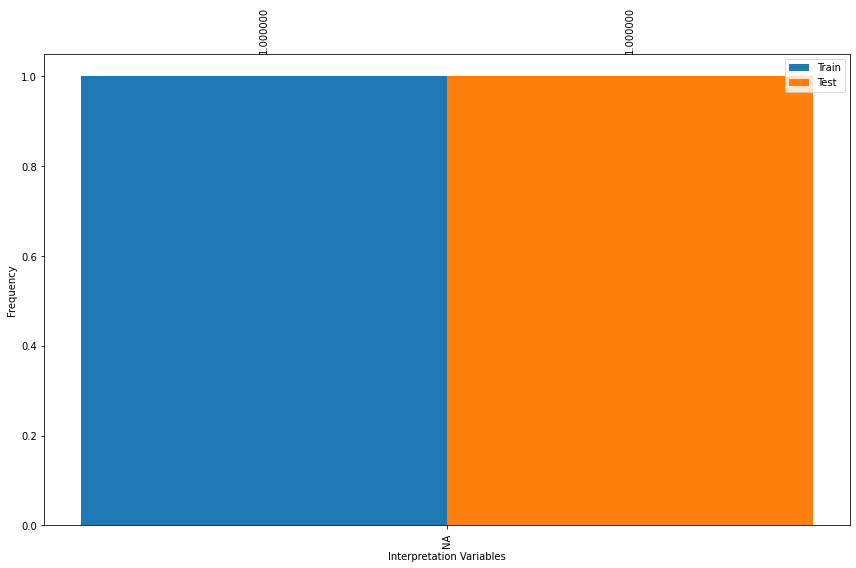

**********************************************************************************************************
PLOT FOR : SEGMENT


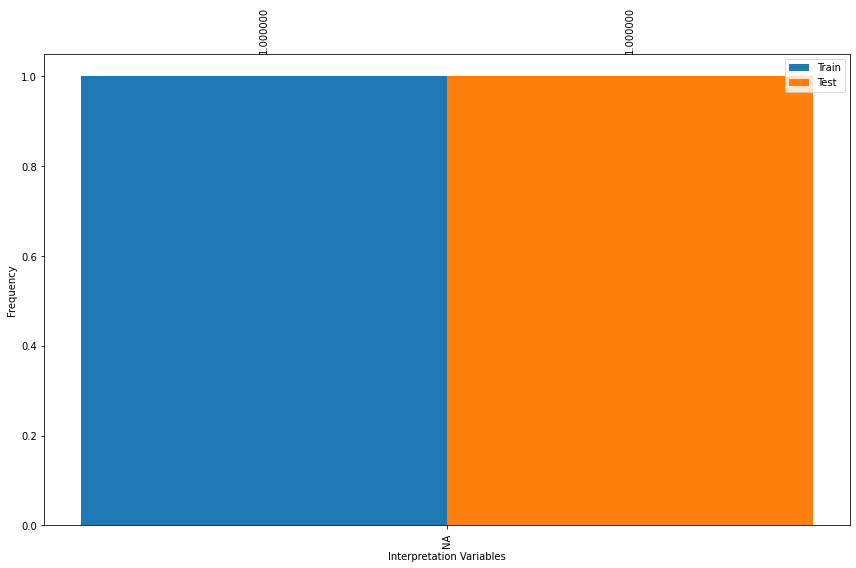

**********************************************************************************************************
PLOT FOR : EXPRESSED POPULATION SIGNAL


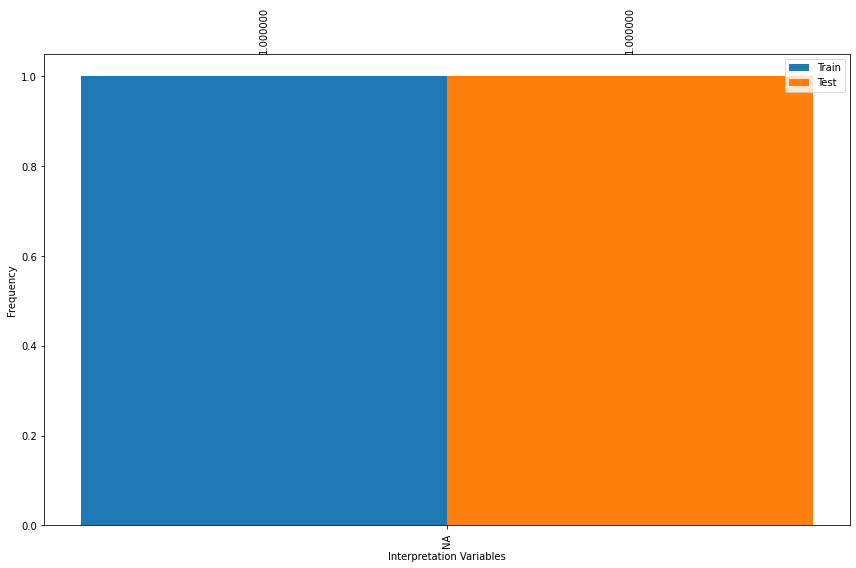

**********************************************************************************************************
PLOT FOR : BRGDGT


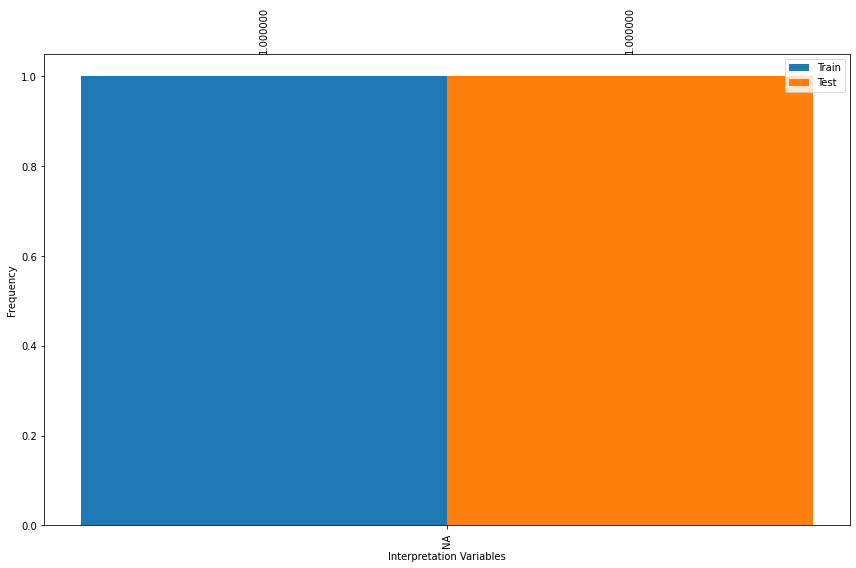

**********************************************************************************************************
PLOT FOR : CORE


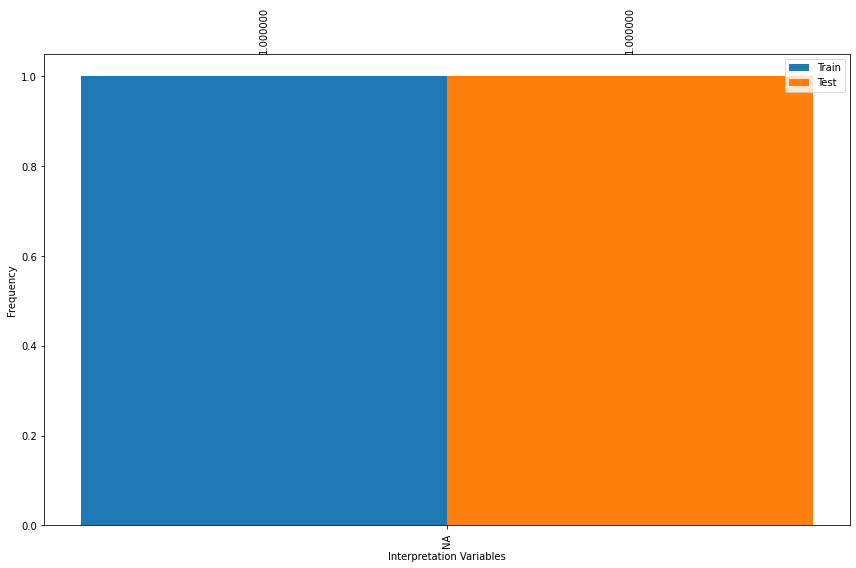

**********************************************************************************************************
PLOT FOR : 37:2ALKENONECONCENTRATION


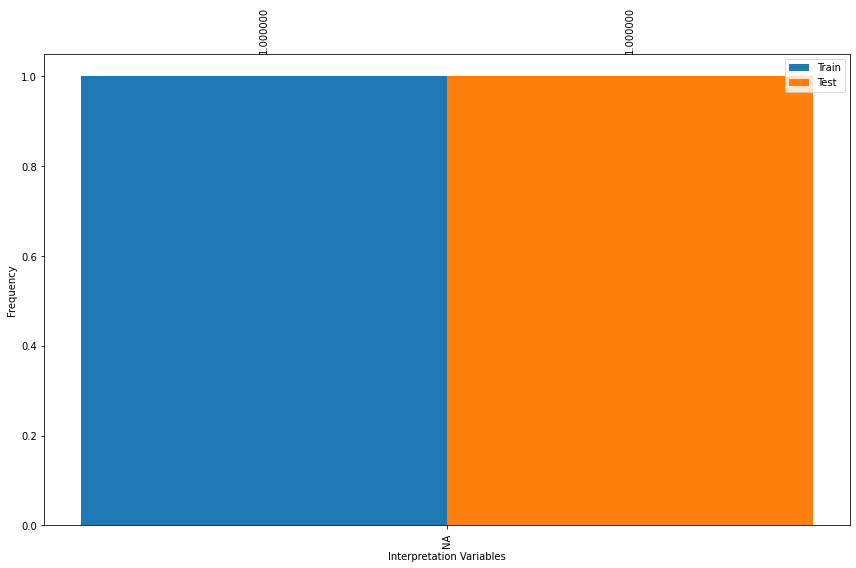

**********************************************************************************************************
PLOT FOR : BIOGENIC SILICA


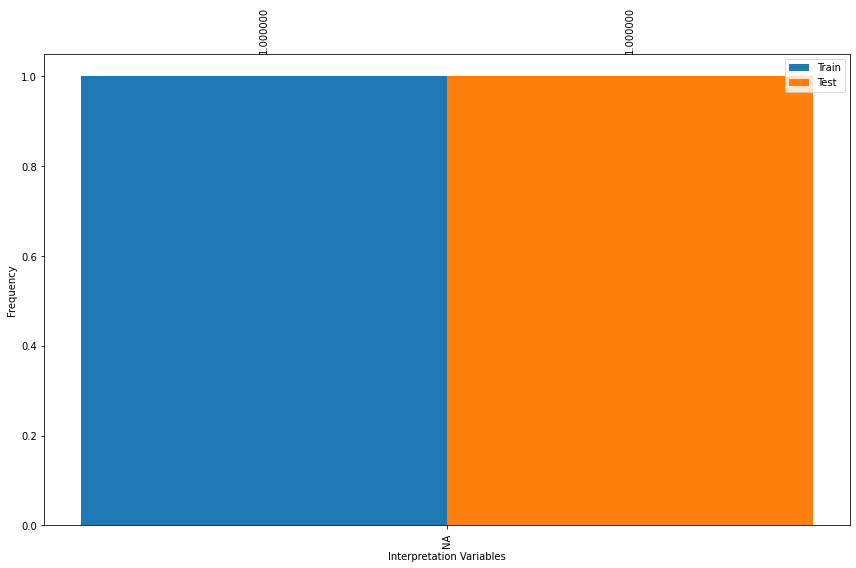

**********************************************************************************************************
PLOT FOR : SULFATE


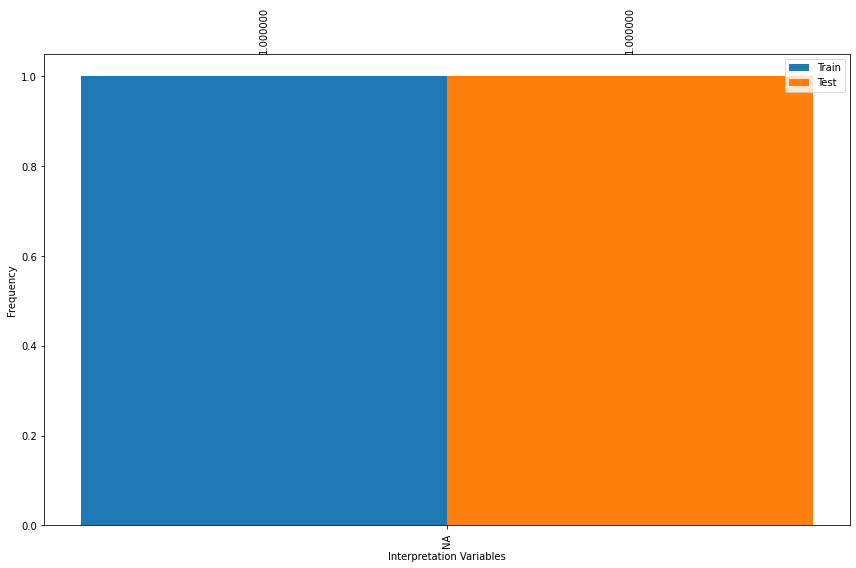

**********************************************************************************************************
PLOT FOR : UK37


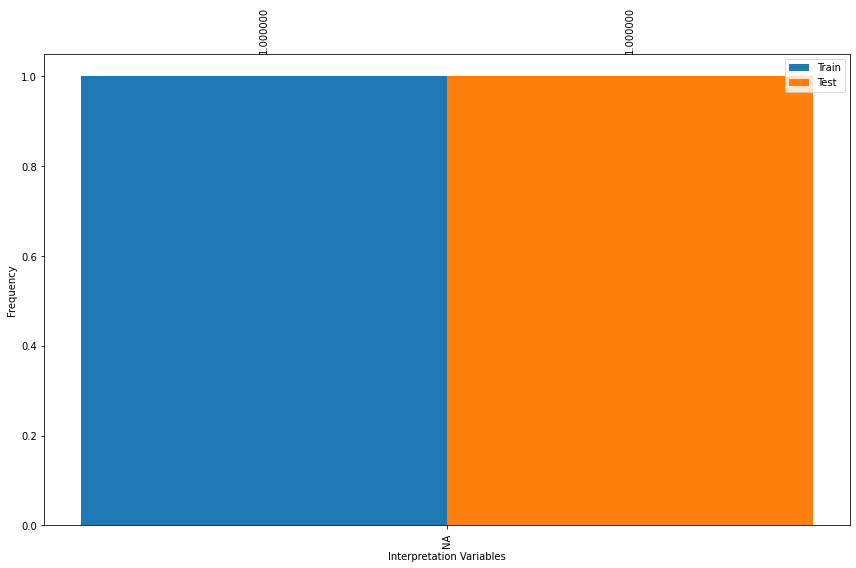

**********************************************************************************************************
PLOT FOR : BIT


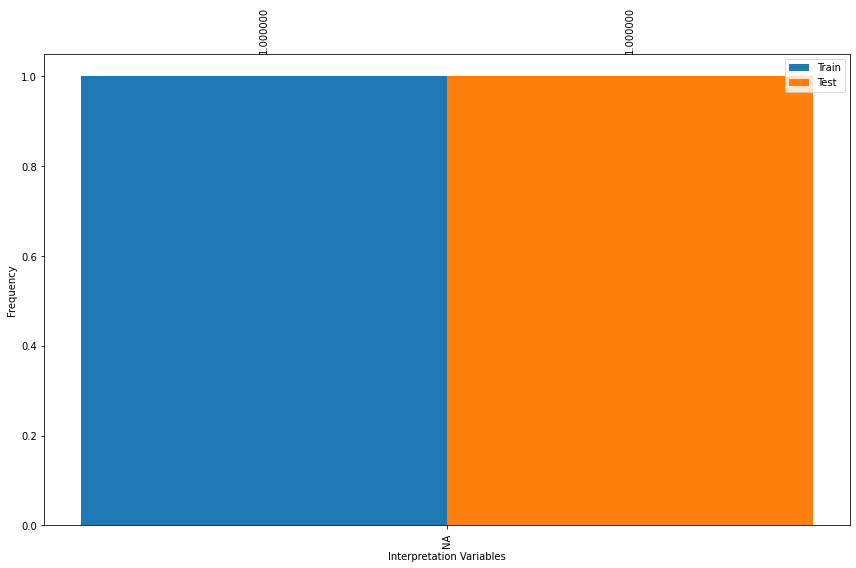

**********************************************************************************************************
PLOT FOR : CALCIFICATION


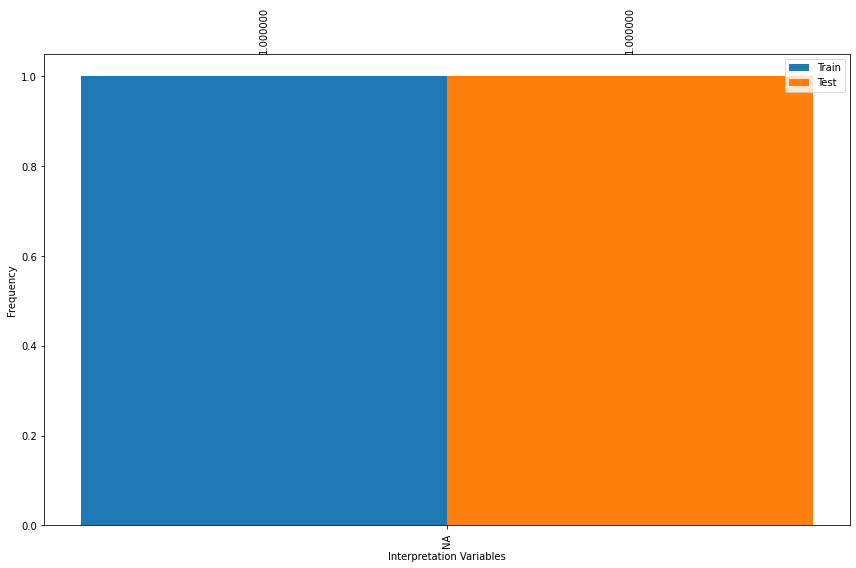

**********************************************************************************************************
PLOT FOR : BUBBLENUMBERDENSITY


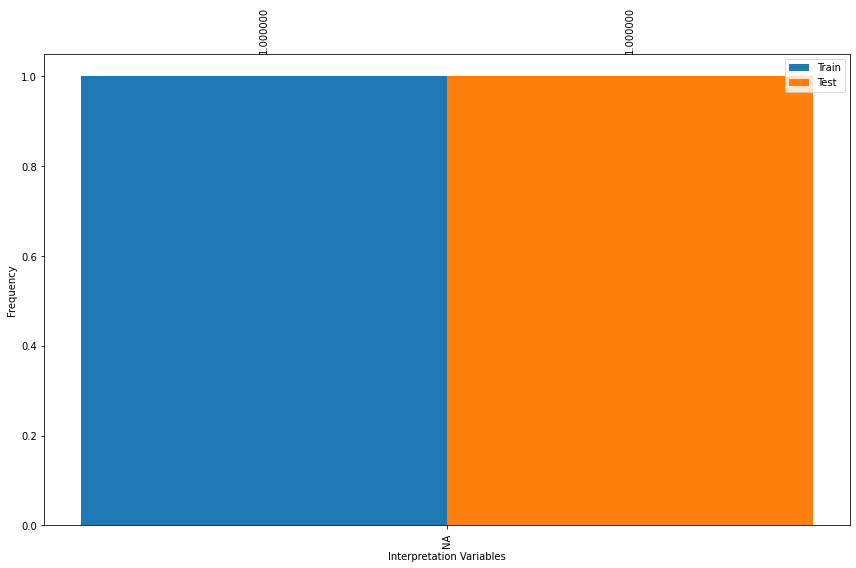

**********************************************************************************************************
PLOT FOR : NITRATE


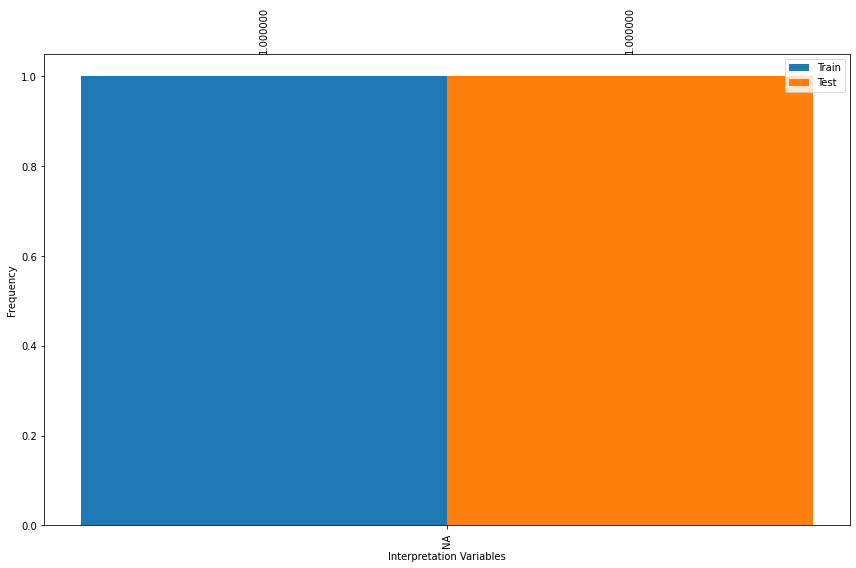

**********************************************************************************************************
PLOT FOR : D-EXCESS


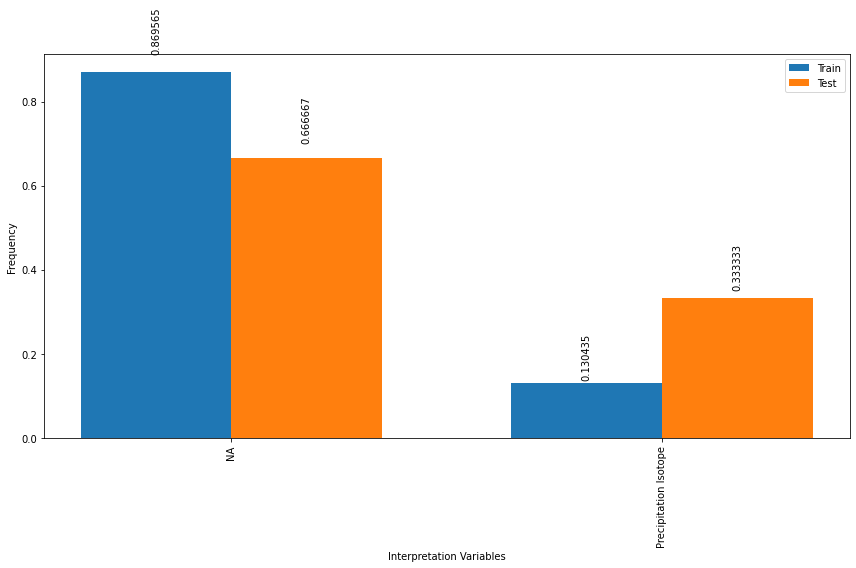

**********************************************************************************************************
PLOT FOR : F


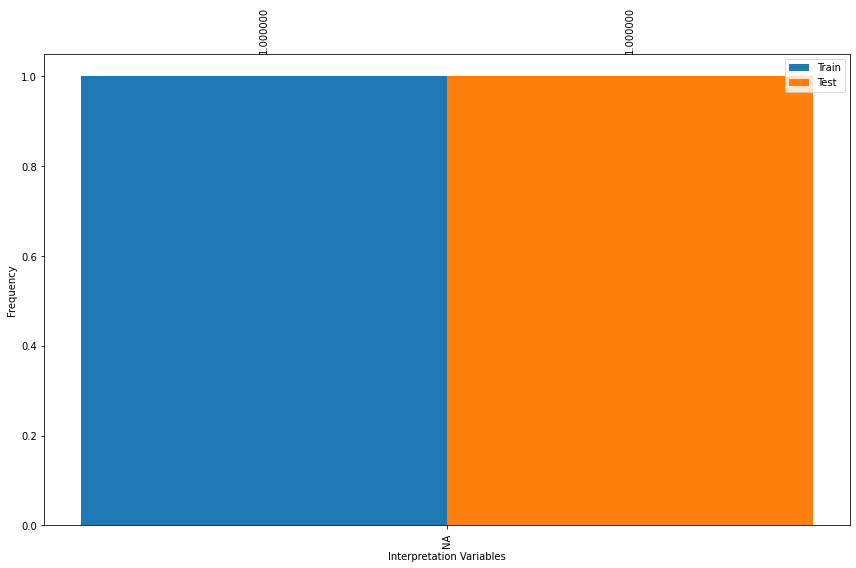

**********************************************************************************************************
PLOT FOR : NA


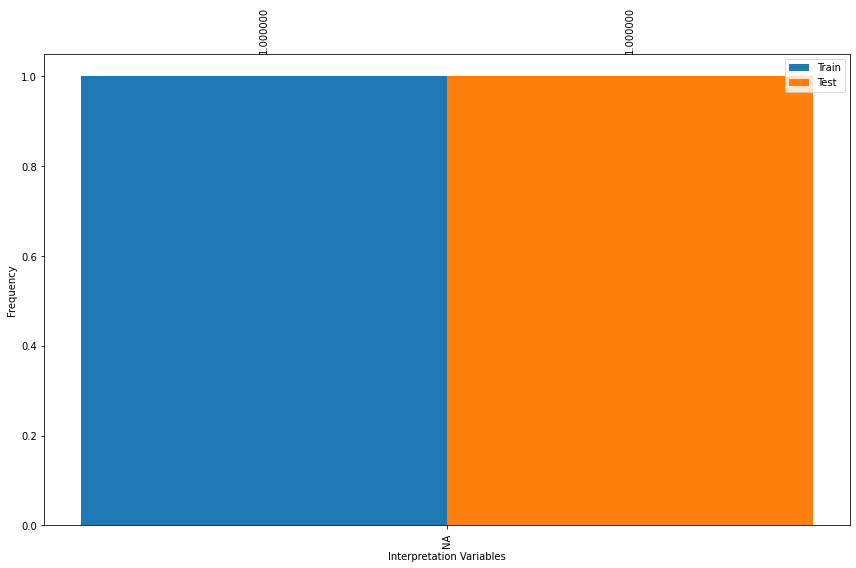

**********************************************************************************************************
PLOT FOR : THICKNESS


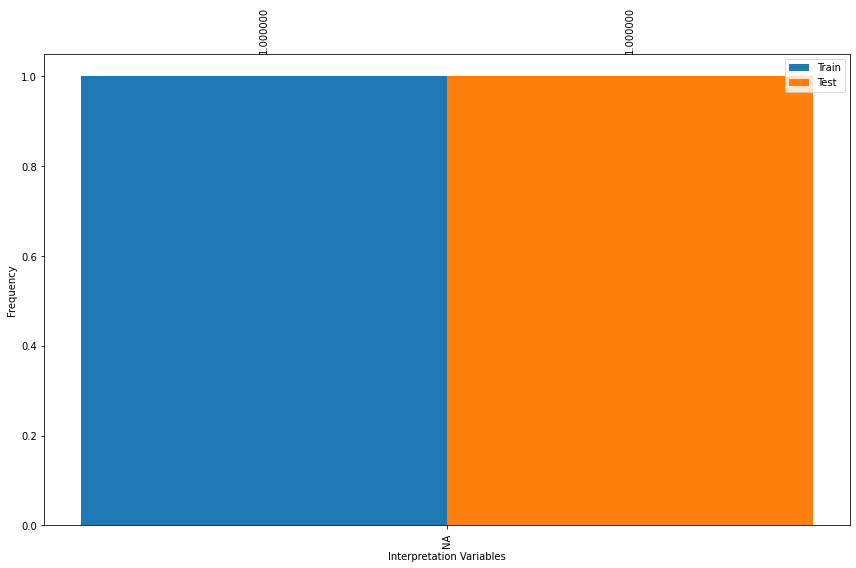

**********************************************************************************************************
PLOT FOR : UK37'


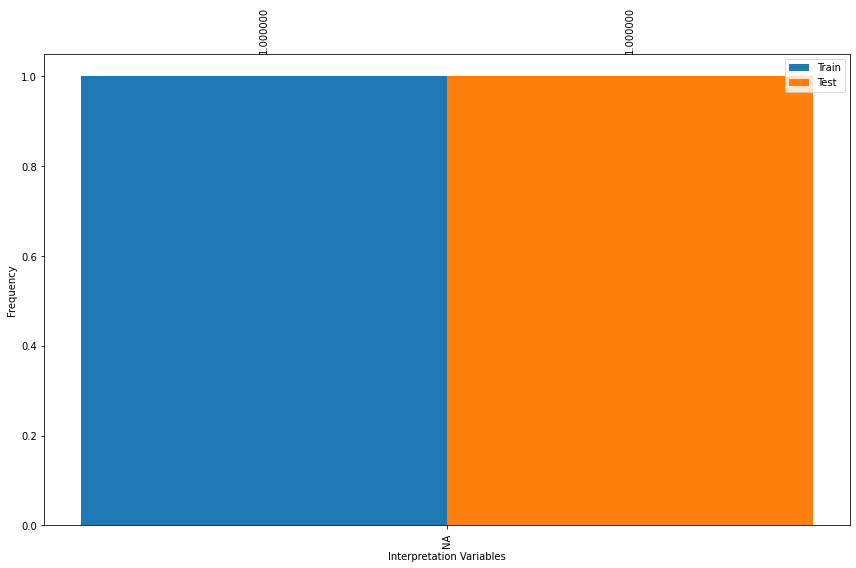

**********************************************************************************************************
PLOT FOR : NOTES


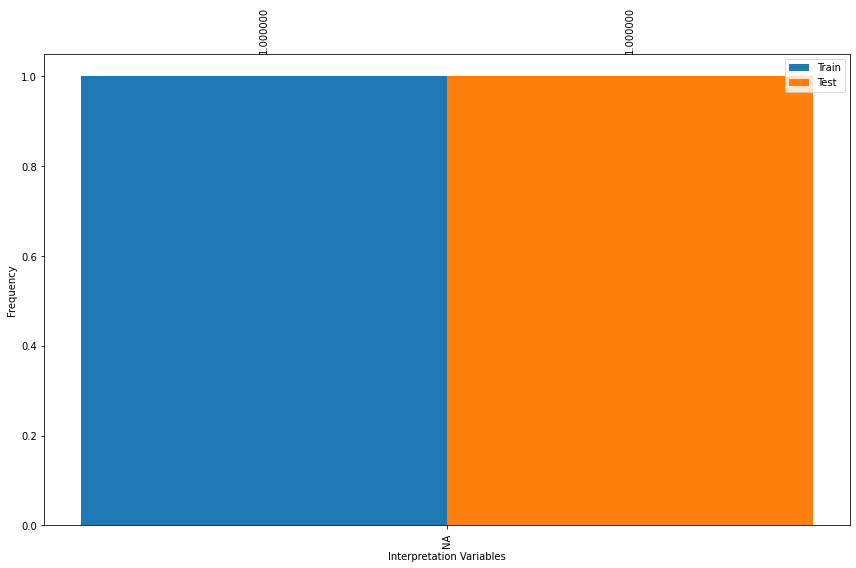

**********************************************************************************************************
PLOT FOR : DENSITY


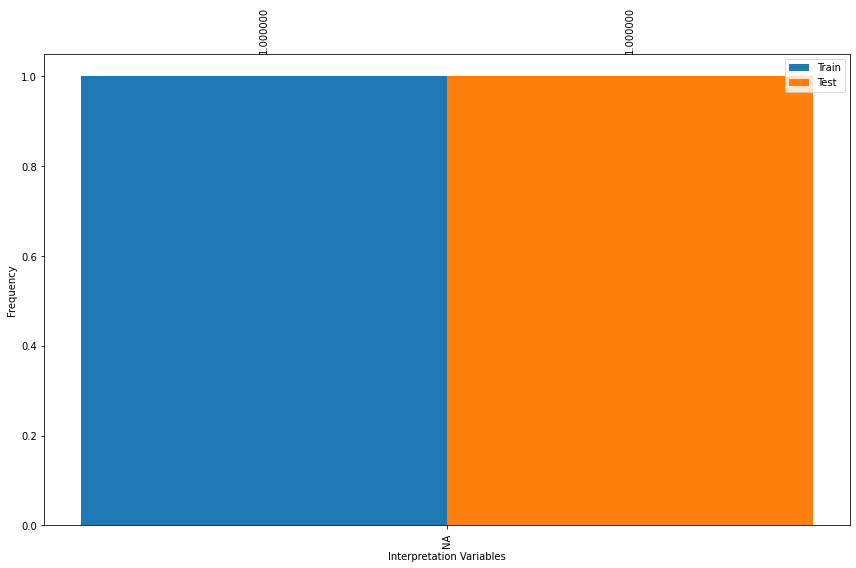

**********************************************************************************************************
PLOT FOR : MAXIMUM LATEWOOD DENSITY


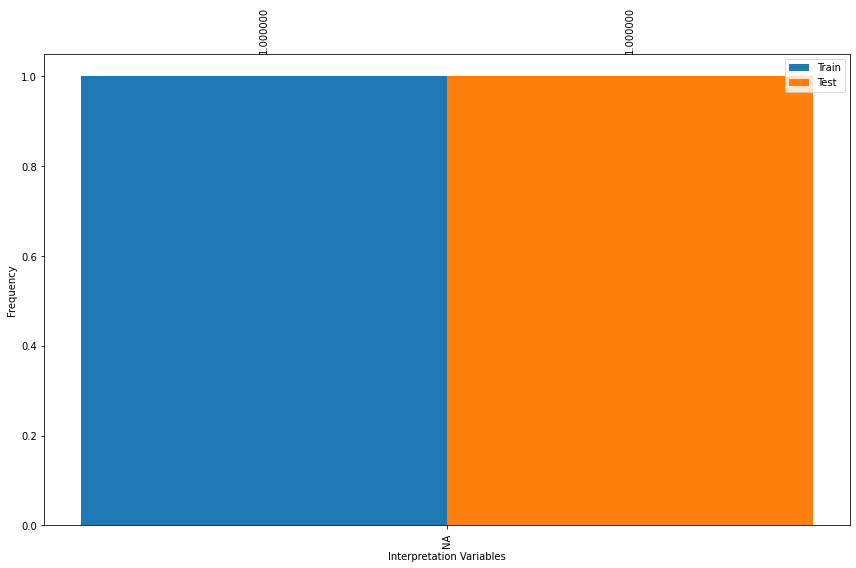

**********************************************************************************************************
PLOT FOR : AMMONIUM


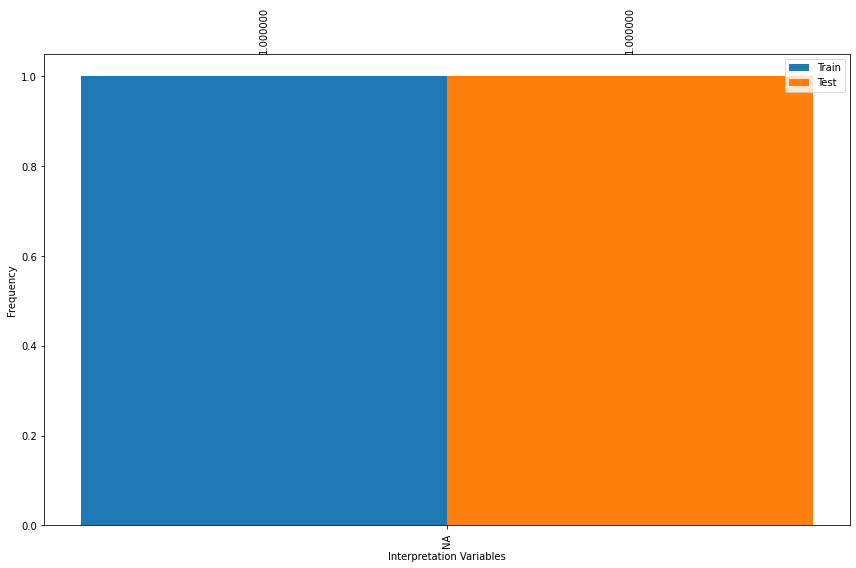

**********************************************************************************************************
PLOT FOR : MBT


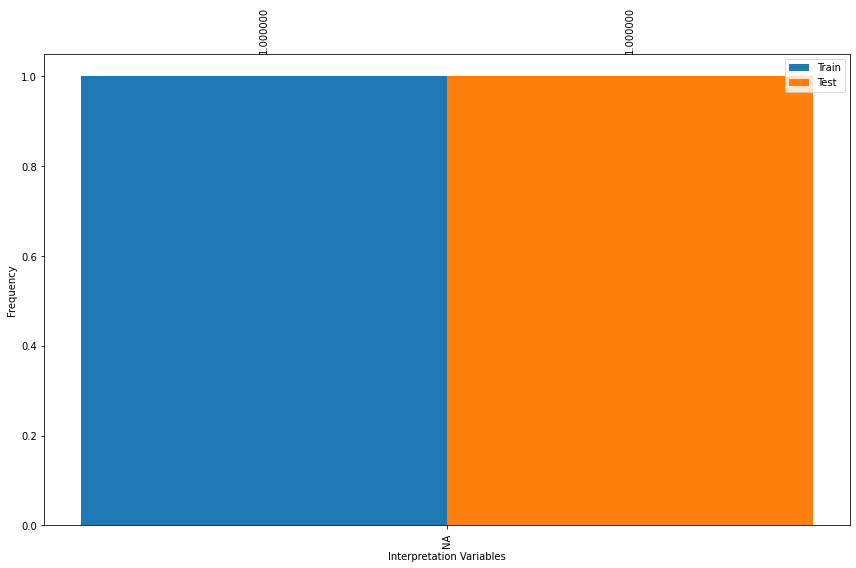

**********************************************************************************************************
PLOT FOR : LAMINATHICKENSS


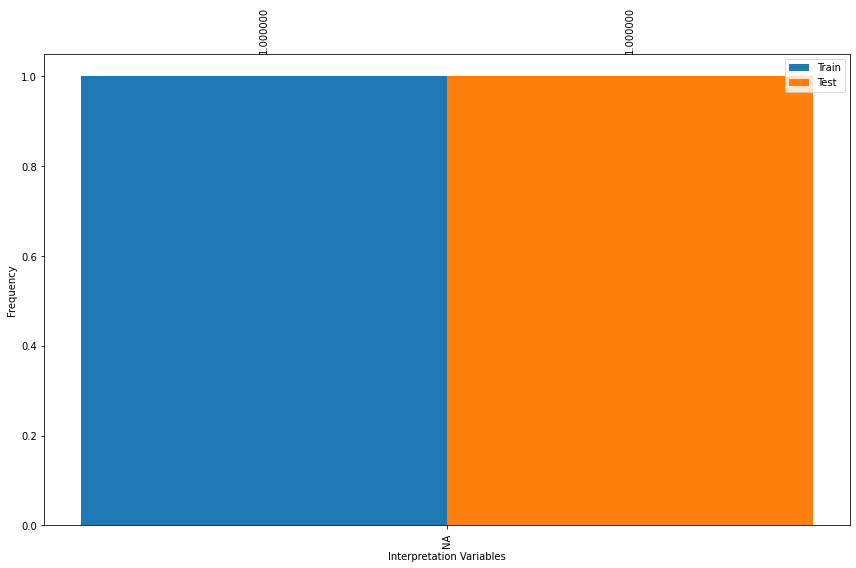

**********************************************************************************************************
PLOT FOR : DURATION


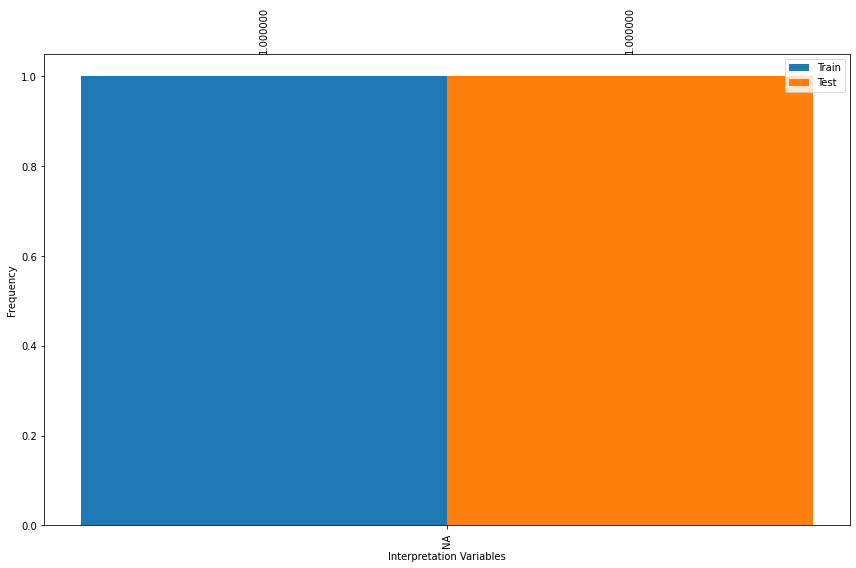

**********************************************************************************************************
PLOT FOR : MG


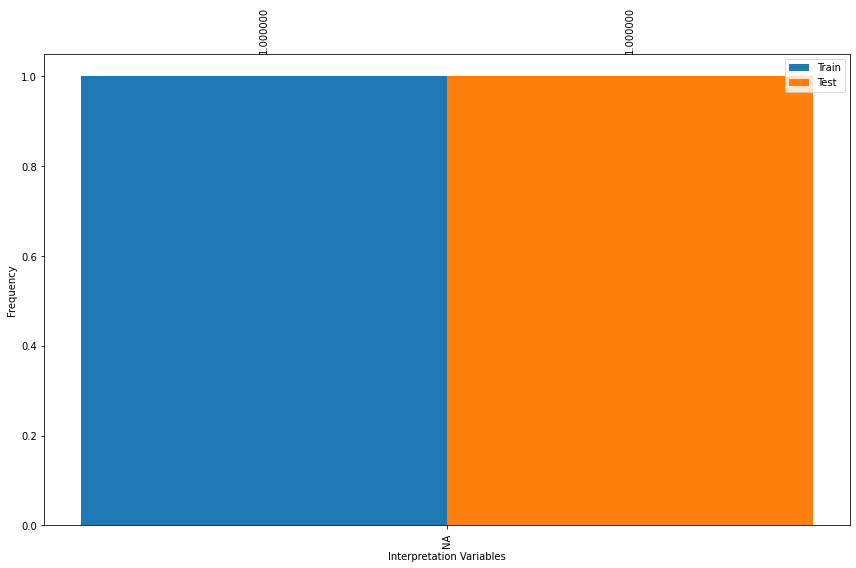

**********************************************************************************************************


In [10]:
proxy_interp_train = calc_freq(train_df, 'proxyObservationType', 'interpretation/variable')
proxy_interp_test = calc_freq(test_df, 'proxyObservationType', 'interpretation/variable')

normalize_freq(proxy_interp_train)
normalize_freq(proxy_interp_test)

draw_barplots(proxy_interp_train, proxy_interp_test, 'Interpretation Variables')